# Building a regression model with neural networks

### 1. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

%matplotlib inline

np.random.seed(1)

The general **methodology** to build a neural network is to:
1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation (calculate the perceptron output),
    - Implement backward propagation (to get the required corrections for the parameters),
    - Update parameters.
4. Make predictions.

### 2. Impoting Dataset

Data from [Kaggle dataset](https://www.kaggle.com/code/devzohaib/simple-linear-regression/notebook), saved in a file `data/tvmarketing.csv`.
It has two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

In [2]:
path = "data/tvmarketing.csv"
df = pd.read_csv(path)

Viewing some part of the data and plotting it

In [3]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<Axes: xlabel='TV', ylabel='Sales'>

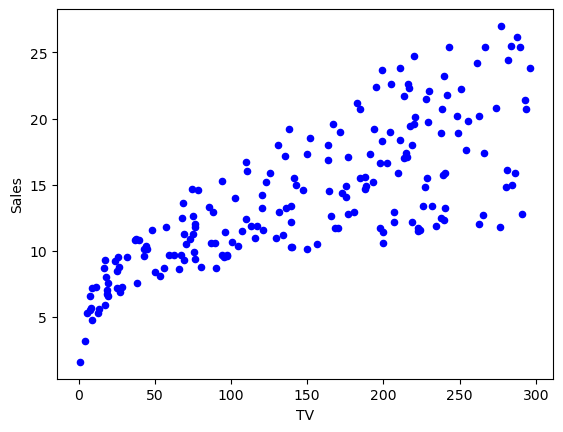

In [4]:
df.plot(x = 'TV', y = 'Sales', kind = 'scatter', c = 'blue')

To make the optimization efficient, we need to normalize the data.
Normalization can be done by:
Subtracting the mean value from each of the elements and divide them by standard deviation.

Column-wise normalization of the dataset can be done for all of the fields at once and is implemented in the following code:

In [5]:
df_norm = (df - np.mean(df)) / np.std(df)

Plotting the data, you can see that it looks similar after normalization, but the values on the axes have changed:

<Axes: xlabel='TV', ylabel='Sales'>

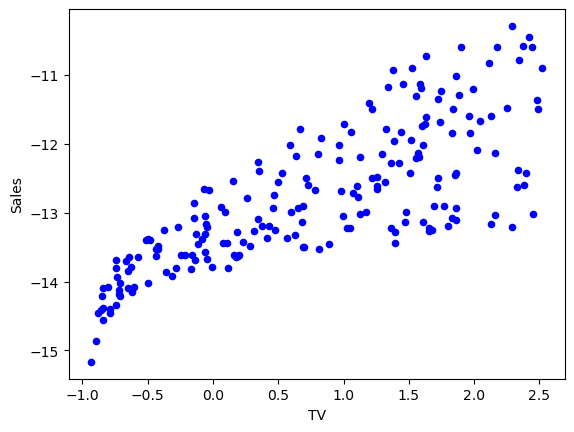

In [6]:
df_norm.plot(x = 'TV', y = 'Sales', kind = 'scatter', c = 'blue')

#### Reshaping the data

In [7]:
X_norm = df_norm['TV']
Y_norm = df_norm['Sales']

X_norm = np.array(X_norm).reshape((1, len(X_norm)))
Y_norm = np.array(Y_norm).reshape((1, len(Y_norm)))

print("The shape of X_norm: " + str(X_norm.shape))
print("The shape of Y_norm: " + str(Y_norm.shape))
print("Number of training = " + str(X_norm.shape[1]))

The shape of X_norm: (1, 200)
The shape of Y_norm: (1, 200)
Number of training = 200


### 3. Implementation Of The Neural Network

##### 3.1 Defining Structure Of The Neural Network

In [8]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset (input size, number of examples)
    Y -- testing dataset (output size, number of examples)
    
    Returns:
    n_x -- the size of input layer
    n_y -- the size of output layer
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return n_x, n_y

(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print("The size of input layer is: n_x = " + str(n_x))
print("The size of output layer is: n_y = " + str(n_y))

The size of input layer is: n_x = 1
The size of output layer is: n_y = 1


##### 3.2 Initializing Model Parameters

In [9]:
def initialize_parameters(n_x, n_y):
    """
    Returns:
    parameters -- python dictionary containing parameters:
                    W -- weights matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """
    
    W = np.random.rand(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    
    parameters = {"W" : W,
                  "b" : b}
    return parameters

parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[0.00417022]]
b = [[0.]]


##### 3.3 Loop

Implenting `forward_propagation()` using:
\begin{align}
Z &= w X + b\\
\hat{Y} &= Z
\end{align}

In [10]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- a python dict containing output of initialization function
    
    Returns:
    Y_hat -- The output
    """
    
    W = parameters["W"]
    b = parameters["b"]
    
    # Forward Propagation to calculate Z
    Z = np.matmul(W, X) + b
    Y_hat = Z
    
    return Y_hat

Y_hat = forward_propagation(X_norm, parameters)
print(Y_hat[0, 0:5])

[ 0.00728321 -0.00175461 -0.00308399  0.00345577  0.00488254]


##### Defining Cost Function

In [11]:
def compute_cost(Y_hat, Y):
    """
    Computes the cost function as sum of squares
    
    Arguments:
    Y_hat -- The output of the neural network before training
    Y -- Actual values
    
    Returns:
    cost -- sum of squares scaled by 1/(2 * number of examples)
    
    """
    
    m = Y_hat.shape[1]
    cost = np.sum((Y_hat - Y)**2) / (2 * m)
    
    return cost

print("cost = " + str(compute_cost(Y_hat, Y_norm)))

cost = 82.19696781832559
